In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
data  = pd.read_csv("yellow_tripdata_2018-01.csv", usecols= ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'PULocationID', 'trip_distance'])
data = data.drop(data[(data.trip_distance <= 0) | (data.tpep_dropoff_datetime == data.tpep_pickup_datetime)].index)


In [3]:
FMT = '%Y-%m-%d  %H:%M:%S'
pickup_time = pd.to_datetime(data['tpep_pickup_datetime'].str.strip(), format = FMT)
dropoff_time = pd.to_datetime(data['tpep_dropoff_datetime'].str.strip(), format = FMT)
delta = (dropoff_time - pickup_time).astype('timedelta64[m]')


In [4]:
delta

0           3.0
1          18.0
2           5.0
3          32.0
4          17.0
5           3.0
6          10.0
7           2.0
8           4.0
9           5.0
10          5.0
11         24.0
12          4.0
13          9.0
14         15.0
15         17.0
16         42.0
17          4.0
18         36.0
19          5.0
20         19.0
21         12.0
22         21.0
23         26.0
24         12.0
25          4.0
26         22.0
27          2.0
28          7.0
29          6.0
           ... 
8759842    19.0
8759843    12.0
8759844     3.0
8759845    16.0
8759846    12.0
8759847    11.0
8759848     7.0
8759849    13.0
8759850     7.0
8759851    22.0
8759852    28.0
8759853    21.0
8759854    14.0
8759855     4.0
8759856    30.0
8759857     7.0
8759858     3.0
8759859    19.0
8759860    34.0
8759861     1.0
8759862     6.0
8759863    15.0
8759864     8.0
8759865     4.0
8759866     4.0
8759867    10.0
8759868    10.0
8759869    12.0
8759870     3.0
8759871     9.0
Length: 8704275, dtype: 

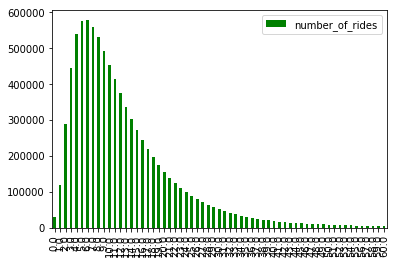

In [5]:
agg = pd.DataFrame(delta.value_counts(), columns = ['number_of_rides'])
agg = agg[agg.index >= 0]


distro = agg[agg.index <= 60]
distro = distro.sort_index()
distro.plot.bar(color = 'g')


0.5291592924166574

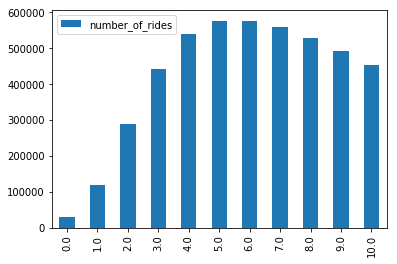

In [6]:
less_ten = agg[agg.index <= 10]
less_ten = less_ten.sort_index()

less_ten.plot.bar()

percent1 = (less_ten.cumsum() / delta.size).tail(1).number_of_rides.item()
percent1


0.3088370944162495

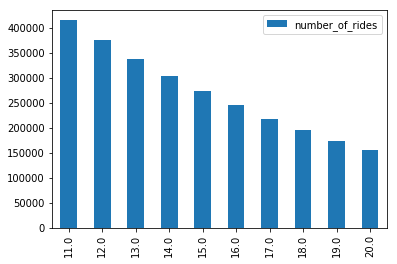

In [7]:
less_twenty = agg[agg.index <= 20]
less_twenty = less_twenty[less_twenty.index > 10]
less_twenty = less_twenty.sort_index()

less_twenty.plot.bar()

percent2 = (less_twenty.cumsum() / delta.size).tail(1).number_of_rides.item()
percent2

0.10151965557154387

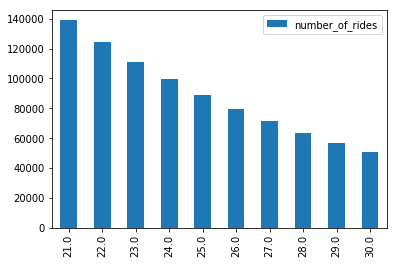

In [8]:
more = agg[agg.index > 20]
more = more[more.index <= 30]

more.plot.bar()

more = more.sort_index()
percent3 = (more.cumsum() / delta.size).tail(1).number_of_rides.item()
percent3

In [9]:
more_hour = agg[agg.index > 30] 
more_hour = more_hour.sort_index()
percent4 = (more_hour.cumsum() / delta.size).tail(1).number_of_rides.item()
percent4

0.06048372782339712

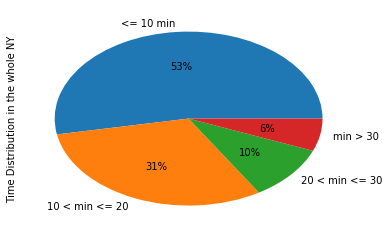

In [10]:
d = {'Time Distribution in the whole NY': [percent1, percent2, percent3, percent4]}
df = pd.DataFrame(data=d, index=['<= 10 min', '10 < min <= 20', '20 < min <= 30', 'min > 30'])
df['Time Distribution in the whole NY'].plot.pie(autopct='%1.0f%%')

In [3]:
#JOIN TABLES
data2 = pd.read_csv("taxi _zone_lookup.csv")
borough = data.join(data2.set_index('LocationID'), on='PULocationID')

In [35]:
p1 = {}
p2 = {}
p3 = {}
p4 = {}
b = ['Manhattan', 'Queens', 'EWR', 'Bronx', 'Staten Island', 'Brooklyn', 'Unknown']
FMT = '%Y-%m-%d  %H:%M:%S'

for i in b:
    print (i)
    bor = borough[borough.Borough == str(i)]
    pickup_time = pd.to_datetime(bor['tpep_pickup_datetime'].str.strip(), format = FMT)
    dropoff_time = pd.to_datetime(bor['tpep_dropoff_datetime'].str.strip(), format = FMT)
    delta = (dropoff_time - pickup_time).astype('timedelta64[m]')
    
    agg = pd.DataFrame(delta.value_counts(), columns = ['y'])
    agg = agg[agg.index >= 0]
    
    less_ten = agg[agg.index <= 10].sort_index()
    try:
        pr1 = (less_ten.cumsum() / delta.size).tail(1).y.item()
    except:
        pr1 = 0
    p1[str(i)] = pr1 
    less_twenty = agg[agg.index <= 20]
    less_twenty = less_twenty[less_twenty.index > 10].sort_index()
    try:
        pr2 = (less_twenty.cumsum() / delta.size).tail(1).y.item()
    except:
        pr2 = 0
    p2[str(i)] = pr2 
    more = agg[agg.index > 20]
    more = more[more.index <= 30].sort_index()
    try :
        pr3 = (more.cumsum() / delta.size).tail(1).y.item()
    except:
        pr3 = 0
    p3[str(i)] = pr3 
    more_hour = agg[agg.index > 30].sort_index()
    try :
        pr4 = (more_hour.cumsum() / delta.size).tail(1).y.item()
    except:
        pr4 = 0
    p4[i] = pr4


Manhattan
Queens
EWR
Bronx
Staten Island
Brooklyn
Unknown


In [36]:
my1 = pd.DataFrame.from_dict(p1, orient='index', dtype=None, columns=['<= 10 min'])
my2 = pd.DataFrame.from_dict(p2, orient='index', dtype=None, columns=['10 < min <= 20'])
my3 = pd.DataFrame.from_dict(p3, orient='index', dtype=None, columns=['20 < min <= 30'])
my4 = pd.DataFrame.from_dict(p4, orient='index', dtype=None, columns=['min > 30'])


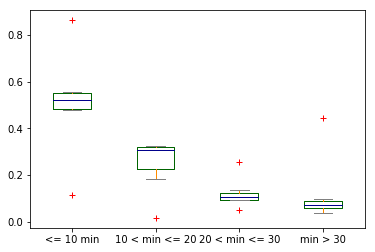

In [37]:
result = pd.concat([my1, my2, my3], axis=1)
my4 = my4.reset_index(drop=True)
result = result.reset_index(drop=True)
result = result.join(my4)
result = result.rename(index={0: 'Manhattan', 1: 'Queens', 2: 'EWR', 3:'Bronx', 4: 'Staten Island', 5:'Brooklyn', 6:'Unknown'})

color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
result.plot.box(color = color, sym='r+')


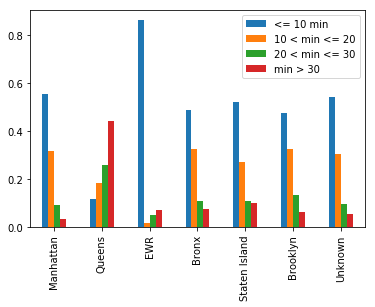

In [38]:
result.plot.bar()

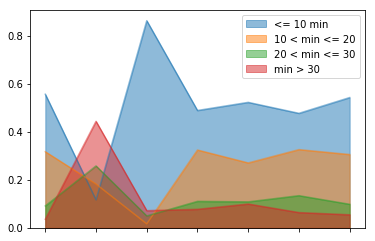

In [39]:
result.plot.area(stacked = False)
